# Cross-Cohort Music Recommendation - Clustering

Now that you've completed EDA, utilize your insights to select the correct model and subsequently apply machine learning on your dataset.



## Questions
## Is this a supervised or unsupervised task? Furthermore are we performing classification or regression?  

This is an unsupervised learning task because we are not using labled target variables to train the model, instead we are finding structure in the data/sound embeddings without predefined catergories. 

Since clustering is the goal, this is neither classification nor regression,it'spurly exploratory grouping.

## Are you predicting for multiple classes or binary classes?  

We are predictingmultiple clusters/classes, since songs can naturally group into several catergories based on similarities in ther embeddings. 

The number of clusters is not predefined; it will be determined by the clustering algorithm and potentially validated with metrics like sihouette score.

## Given these observations, which machine learning model will you choose?  

Given these observations, a good choice is K-means Clustering because: 
- The PCA embeddings are numeric andalready standardized-like due to vectorization.
- Kmeans is efficient for high-dimensional spaces after PCA.
- The number of clusters can be tuned using the elbow method or the silhoutte score.



### 1) Set up your predictors

Use your cleaned and transformed dataset to divide your features and labels into training and testing sets. Make sure you’re only using numeric or properly encoded features.  

In [41]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

# TODO: import your selected model and its evaluation metrics
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

In [42]:
# TODO: load in data set
music_df = pd.read_csv('../data/music_embeds.csv')
music_df.head()

,filename,dim_0,dim_1,dim_2,dim_3,dim_4,dim_5,dim_6,dim_7,dim_8,...,dim_760,dim_761,dim_762,dim_763,dim_764,dim_765,dim_766,dim_767,song,genre
0,A Fan's Mail,-0.004854,-0.014205,-0.004760,-0.006950,0.000537,0.001243,-0.013726,0.000464,-0.006346,...,-0.003038,-0.008058,-0.006683,-0.001391,-0.011345,-0.002085,-0.004069,-0.017774,A Fan's Mail,funk
1,Abracadabra,-0.009634,-0.014021,-0.001026,-0.005184,-0.000343,0.000106,0.001932,-0.003759,-0.008788,...,-0.007019,-0.006988,-0.013948,-0.000976,-0.013896,-0.012256,0.008407,-0.011757,Abracadabra,pop
2,Aguas De Marco,0.001255,-0.017850,-0.013220,-0.004844,-0.004731,-0.008914,0.005198,-0.000873,-0.010008,...,0.000567,-0.015456,-0.005778,-0.003446,-0.016408,-0.015601,0.005135,-0.005079,Aguas De Marco,bossa nova
3,Another Time,-0.005455,-0.010048,-0.012848,0.015155,0.006223,0.003988,-0.007696,-0.000192,0.002167,...,-0.005628,-0.020266,-0.005505,-0.007672,-0.020972,-0.005813,-0.000709,-0.005729,Another Time,hip hop
4,Belong to the World,-0.003881,-0.003831,-0.004683,-0.017928,0.001103,0.005035,0.002506,-0.005794,-0.015744,...,-0.003443,0.002318,-0.010466,-0.018116,-0.008590,-0.010983,-0.009556,-0.004235,Belong to the World,hip hop


In [43]:
# TODO: select your predictor columns
X = music_df.drop(columns=['filename', 'song', 'genre'])
X.head()

,dim_0,dim_1,dim_2,dim_3,dim_4,dim_5,dim_6,dim_7,dim_8,dim_9,...,dim_758,dim_759,dim_760,dim_761,dim_762,dim_763,dim_764,dim_765,dim_766,dim_767
0,-0.004854,-0.014205,-0.004760,-0.006950,0.000537,0.001243,-0.013726,0.000464,-0.006346,0.005474,...,-0.013677,-0.067677,-0.003038,-0.008058,-0.006683,-0.001391,-0.011345,-0.002085,-0.004069,-0.017774
1,-0.009634,-0.014021,-0.001026,-0.005184,-0.000343,0.000106,0.001932,-0.003759,-0.008788,0.000868,...,0.016843,0.051512,-0.007019,-0.006988,-0.013948,-0.000976,-0.013896,-0.012256,0.008407,-0.011757
2,0.001255,-0.017850,-0.013220,-0.004844,-0.004731,-0.008914,0.005198,-0.000873,-0.010008,-0.006639,...,0.005032,-0.011055,0.000567,-0.015456,-0.005778,-0.003446,-0.016408,-0.015601,0.005135,-0.005079
3,-0.005455,-0.010048,-0.012848,0.015155,0.006223,0.003988,-0.007696,-0.000192,0.002167,-0.003131,...,-0.012346,-0.020413,-0.005628,-0.020266,-0.005505,-0.007672,-0.020972,-0.005813,-0.000709,-0.005729
4,-0.003881,-0.003831,-0.004683,-0.017928,0.001103,0.005035,0.002506,-0.005794,-0.015744,0.005363,...,-0.006812,0.014917,-0.003443,0.002318,-0.010466,-0.018116,-0.008590,-0.010983,-0.009556,-0.004235


### 2) Search for best clusters

Use tools the elbow method or silhouette score to find the best clusters for your model.

c:\Users\adiaz\anaconda3\envs\ds\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\adiaz\anaconda3\envs\ds\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\adiaz\anaconda3\envs\ds\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\adiaz\anaconda3\envs\ds\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known

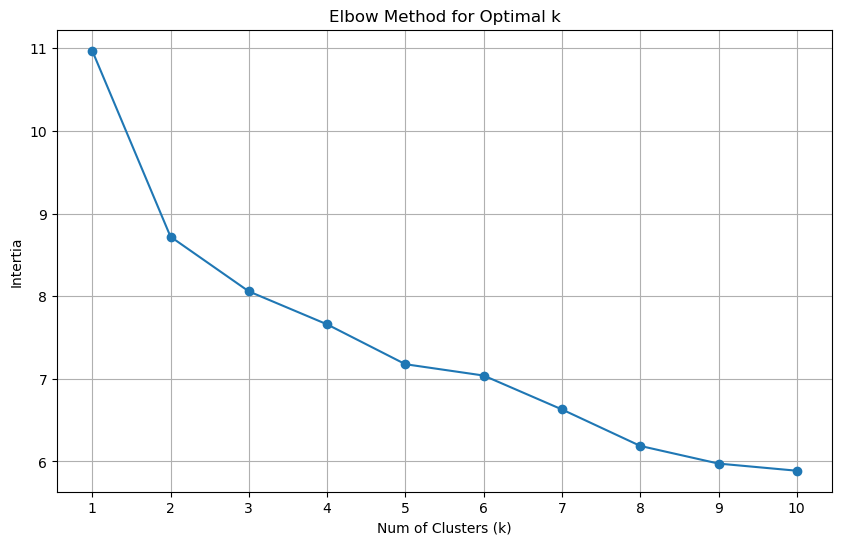

In [44]:
# sesarch for best clusters, using elbow method
inertia = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X)
    inertia.append(kmeans.inertia_)
plt.figure(figsize=(10, 6))
plt.plot(range(1, 11), inertia, marker='o')
plt.title('Elbow Method for Optimal k')
plt.xlabel('Num of Clusters (k)')
plt.ylabel('Intertia')
plt.xticks(range(1, 11))
plt.grid()
plt.show()

c:\Users\adiaz\anaconda3\envs\ds\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\adiaz\anaconda3\envs\ds\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\adiaz\anaconda3\envs\ds\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\adiaz\anaconda3\envs\ds\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known

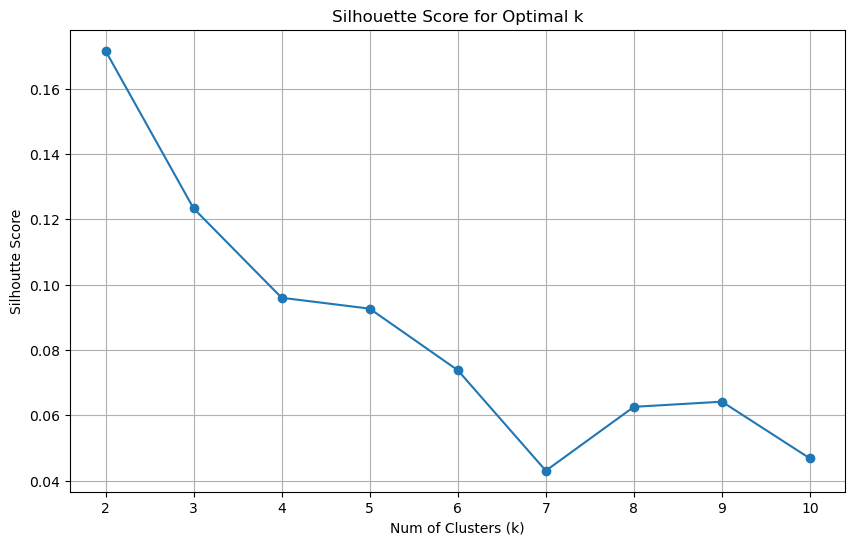

In [45]:
# search for best clusters, using silhouette score
silhouette_scores = []
for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X)
    score = silhouette_score(X, kmeans.labels_)
    silhouette_scores.append(score)
plt.figure(figsize=(10, 6))
plt.plot(range(2, 11), silhouette_scores, marker='o')
plt.title('Silhouette Score for Optimal k')
plt.xlabel('Num of Clusters (k)')
plt.ylabel('Silhoutte Score')
plt.xticks(range(2, 11))
plt.grid()
plt.show()

In [46]:
# Train KMeans with the best k base on elbow method
k = 5 # best k based on elbow method
kmeans_music = KMeans(n_clusters=k, random_state=42)
kmeans_music.fit(X)
music_df['cluster'] = kmeans.labels_


c:\Users\adiaz\anaconda3\envs\ds\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


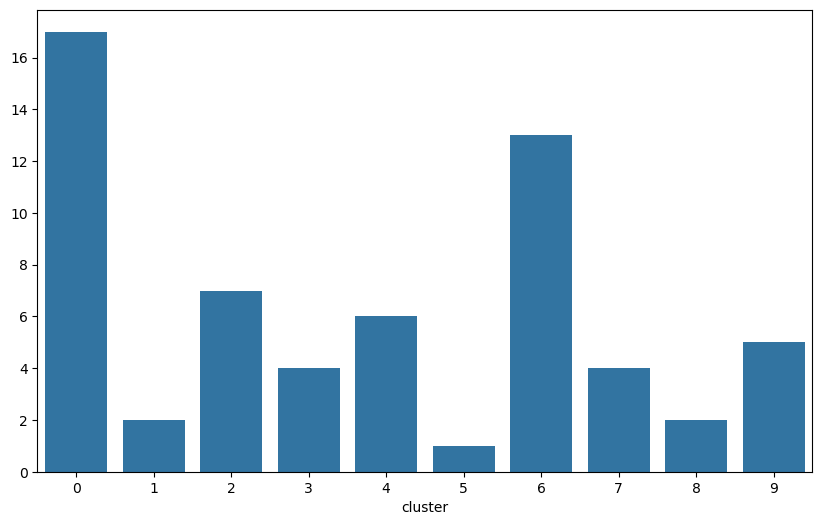

In [47]:
#Evaluate the clusters
cluster_counts = music_df['cluster'].value_counts().sort_index()
plt.figure(figsize=(10, 6))
sns.barplot(x=cluster_counts.index, y=cluster_counts.values)
plt.show()

In [48]:
# predict your labels on your predictors and assign it to a new column
labels = kmeans_music.predict(X)
music_df["labels"] = labels
# view your cluster assignments
labeled_music = music_df[["song", "genre", "labels"]]
labeled_music.head()

,song,genre,labels
0,A Fan's Mail,funk,2
1,Abracadabra,pop,1
2,Aguas De Marco,bossa nova,0
3,Another Time,hip hop,2
4,Belong to the World,hip hop,3


In [49]:
# view the songs that fall into specific clusters, what sort of insight do you think was captured here?
labeled_music[labeled_music["labels"] == 3]

,song,genre,labels
4,Belong to the World,hip hop,3
8,Dancer,rock,3
9,Diamonds,pop,3
16,Freedom Time,hip hop,3
17,Freefall,house,3
23,I'm Gonna Be,pop rock,3
27,Kalidoscope,jazz,3
32,Make Yours a Happy Home,soul,3
35,Niagra Falls,R&B,3
39,Promises (feat. Joe L Barnes),gospel,3


### 3) Train your model

Select the model with best cluster number and generate predictions on your test set. Evaluate how "well" your model clustered songs by evaluating the songs that exist in the same cluster assignments. 

In [50]:
# predict labels on your predictors and assign it to a new column
labels = kmeans_music.predict(X)
music_df["labels"] = labels

# view cluster assignments
labeled_music = music_df[["filename", "genre", "labels"]]
labeled_music.head()

,filename,genre,labels
0,A Fan's Mail,funk,2
1,Abracadabra,pop,1
2,Aguas De Marco,bossa nova,0
3,Another Time,hip hop,2
4,Belong to the World,hip hop,3


In [51]:
# view the songs that fall into specific clusters, what sort of insight do you think was captured here?
labeled_music[labeled_music["labels"] == 4]

# just submit now!!


,filename,genre,labels
19,Heart of Gold,folk rock,4
25,It's Possible Again,soundtrack,4
31,Love theme from the robe,jazz,4
47,Summer in the City,jazz,4
54,The Word 2,pop,4


Serialize your model and run it in your dashboard via `streamlit run recommender.py`

In [52]:
# serialize your model
import joblib

joblib.dump(kmeans_music, "../kmeans_model.pkl")

['../kmeans_model.pkl']